In [ ]:
import math
import scipy.stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Задание № 0
Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

желаемая точность Δ = 3;
дисперсия σ2 = 225;
уровень доверия β = 0.95.
Ответ округлите до целого

In [ ]:
accuracy = 3
std = 15
z = st.norm.ppf(0.95)
n = round(((z * std) / accuracy) ** 2)
n

68

Задание № 1
Постройте 98 % доверительный интервал для среднего значения, если известно, что

объем выборки n = 25;
среднее значение по выборке 
 
 = 130;
Из достоверных источников известно стандартное отклонение σ=15 .
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого

In [ ]:
n = 25
x = 130
std = 15
disp = 0.02
z = st.norm.ppf(0.98)

accuracy = (std / math.sqrt(n)) * z
CI_left = 130 - accuracy
CI_right = 130 + accuracy

L = round(CI_right - CI_left)

L

12

Задание № 2
Даны две выборки роста мужчин и женщин.

докажите, используя t-тест Стьюдента, что различие между выборками незначительно, если уровень значимости равен α = 0.001.
покажите различия визуально

In [ ]:
import scipy.stats as stats
np.random.seed(42) #фиксация случайности

men  = st.norm.rvs(loc = 171, scale = 100, size = 150000)  # Выборка мужчин со средним ростом 171
women = st.norm.rvs(loc = 170, scale = 100, size = 150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия
α = 0.001
t, p = st.ttest_ind(men, women)

print(t)

if p < α:
  print('Различия незначительны')
else:
  print('Различия значительны')

3.6635841716708892
Различия незначительны


(array([3.4000e+01, 5.5200e+02, 4.5280e+03, 2.0073e+04, 4.4250e+04,
        4.7373e+04, 2.5465e+04, 6.7820e+03, 8.9200e+02, 5.1000e+01]),
 array([-271.38859664, -185.05607354,  -98.72355044,  -12.39102734,
          73.94149577,  160.27401887,  246.60654197,  332.93906507,
         419.27158817,  505.60411128,  591.93663438]),
 <a list of 10 Patch objects>)

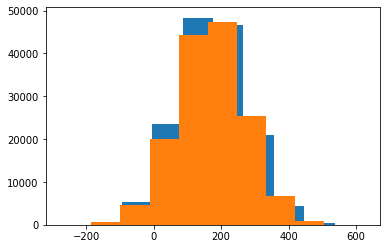

In [ ]:
plt.hist(men)
plt.hist(women)

Задание № 3
Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

стандартное отклонение σ=150 ;
уровень доверия β = 95%;
погрешность Δ=50 рублей.

In [ ]:
std = 150
CI = 0.95
accuracy = 50
z = st.norm.ppf(CI)

n = round(((z * std) / accuracy) ** 2)

n

24

Задание № 4
Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за 0.05 ( α=0.05 ).

In [ ]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [ ]:
import scipy.stats as stats
α = 0.05
oddsratio, pvalue = st.fisher_exact([[10, 15],[39, 34]])


if pvalue < α:
  print('Волшебник') 
else:
  print('Так себе предсказатель') 

Так себе предсказатель


Задание № 5
Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия β=90% для выборки:

In [ ]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

def mean_confidence_interval(data, confidence = 0.90):
    n = len(data)
    x, sem = np.mean(data), st.sem(data)
    accuracy = sem * st.t.ppf((1 + confidence) / 2, n-1)
    return x - accuracy, x + accuracy

mean_confidence_interval(data, confidence = 0.90)

(6.07363110319857, 7.183511753944288)

Задание № 6
Принадлежат ли выборки A и B одному множеству?

оцените это с помощью известных вам тестов для проверок статистических гипотез;
покажите различия визуально.

In [ ]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]
 
α = 0.05
t, p = st.ttest_ind(A, B)

if pvalue < α:
  print('Выборки принадлежат одному множеству')
else:
  print('Выборки не принадлежат одному множеству')

Выборки не принадлежат одному множеству


(array([ 2.,  8., 22.,  0., 28., 20.,  0.,  9.,  4.,  2.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

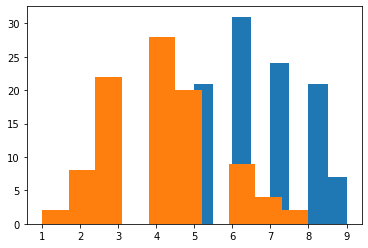

In [ ]:
plt.hist(A)
plt.hist(B)

Задание № 7 (задание без подвоха)
На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.

Предположим, Вы сформировали две гипотезы:

нулевая гипотеза - распределение нормальное;
альтернативная гипотеза - распределение ненормальное.
Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости p-value = 0.03.

Каковы будут ваши выводы?

Будем считать, что у нас нормальное распределение или все-таки нет?

In [ ]:
#требуется только вывод
# не понял, мало данных

Задание № 8
Первая выборка — это пациенты, которых лечили препаратом А. Вторая выборка — пациенты, которых лечили препаратом B.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)

Требуется выяснить, имеется ли значимое различие эффективности препаратов А и B, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики. (уровень значимости принять за 0.05 (5%))

при каком минимальном p-value различия были бы уже значимы?
если выборки незначительно отличаются, то продемонстрируйте это визуально.

In [ ]:
np.random.seed(11)
A = st.norm.rvs(scale=15, loc=169, size=300)
B = st.norm.rvs(scale=14, loc=171.4, size=300)

α = 0.05
stat, p = st.ttest_ind(A, B, equal_var=False) 
print(p)

if p < α:
  print('имеется значимое различие эффективности препаратов')
else:
  print('различий нет')

0.051284961272800134
различий нет


(array([ 1.,  3., 11., 29., 40., 76., 69., 38., 23., 10.]),
 array([122.95604119, 131.18964287, 139.42324455, 147.65684623,
        155.89044792, 164.1240496 , 172.35765128, 180.59125296,
        188.82485464, 197.05845633, 205.29205801]),
 <a list of 10 Patch objects>)

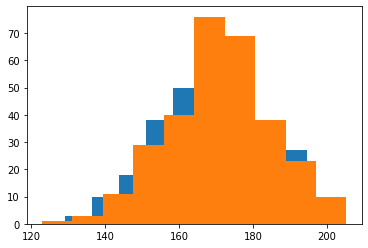

In [ ]:
plt.hist(A)
plt.hist(B)